# Theory
$$
X = \begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1n} \\
    1 & x_{21} & x_{22} & \dots & x_{2n} \\
    \vdots & \vdots & \vdots & \vdots & \vdots \\
    1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}_{(m, n+1)}\text{has}\ m \ \text{datapoints and}\ n+1 \ \text{features}
$$
$$
Y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}_{(m, 1)} \text{has}\ m \ \text{datapoints and 1 feature and } \ \
\theta = \begin{bmatrix}
\theta_1 \\ \theta_2 \\ \vdots \\ \theta_{n+1}
\end{bmatrix}_{(n+1, 1)} \text{has}\ n+1 \ \text{datapoints and 1 feature}
$$
$$
\hat{Y} = \begin{bmatrix}
\hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_m
\end{bmatrix}_{(m, 1)} = \begin{bmatrix}
    1 & x_{11} & x_{12} & \dots & x_{1n} \\
    1 & x_{21} & x_{22} & \dots & x_{2n} \\
    \vdots & \vdots & \vdots & \vdots & \vdots \\
    1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}_{(m, n+1)}\begin{bmatrix}
\theta_1 \\ \theta_2 \\ \vdots \\ \theta_{n+1}
\end{bmatrix}_{(n+1, 1)}
$$
## Cost function
$$
\text{Cost} = \frac{1}{2m}\sum_{i=1}^m(y_i - \hat{y}_i)^2
$$
## Gradient Descent
$$
\theta = \theta + \alpha\times\delta\theta
$$
$$
\delta\theta_{(n+1,1)} = \frac{1}{m}X^T_{(n+1,m)}\left(Y-\hat{Y}\right)_{(m,1)}
$$
## Points to note
- $m=$ number of data-points.
- $\theta \ $ is our machine learning model.
- $Y$ is the set of actual values.
- $\hat{Y}$ is the set of predicted values.
- $\alpha=$ learning rate.

We initialize the value of $\theta = [0,0, ... ,0]$ and keep iterating for around 100-1000 times.
***
# One Hot Encoding
This is a technique used to deal with categorical data. Whenever we have categorical data, we need to clean it because we can't feed textual data into a machine learning algorithm.<br/>
We also can't use numbers to denote them because of the following drawbacks:
- **Arbitrary Ordering:** Numerical encoding imposes an arbitrary ordering on the categories, which may not be appropriate for variables without a clear ordinal relationship.
- **Magnitude Influence:** Some machine learning algorithms might interpret numerical encodings as having meaningful magnitudes, which might lead to incorrect interpretations.
- **Loss of Information:** One-hot encoding preserves all information about the categorical variable, while numerical encoding might lose some information, especially if the numerical values do not reflect any meaningful relationship between categories.
***
# Importing the libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np

dataFrame = pd.read_csv("carprices.csv")
dataFrame

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [2]:
dummy = pd.get_dummies(dataFrame['Car Model'], dtype=int)
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


# Dummy variable trap
- The dummy variable trap occurs when one or more dummy variables are redundant, meaning they can be predicted from the other variables.
- In this case, we can drop any one of the three columns from the dummy-variable table since any one can be determined by checking the values of the other 2 variables.
- For example, we can say the a car's model is **Mercedez Benz C class** if the values for the fields **Audi A5** and **BMW X5** is 0. Same is true for the other models.
- We will drop the **Mercedez Benz C class** column. You can drop any other column as per your requirements.

In [3]:
dummy = dummy.drop("Mercedez Benz C class", axis='columns')
dummy

,Audi A5,BMW X5
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


In [4]:
# we also have to drop the 'Car Model' column from the original dataframe
dataFrame = dataFrame.drop("Car Model", axis = 'columns')
dataFrame = pd.concat([dataFrame, dummy], axis = 'columns')
dataFrame

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [5]:
dependent_feature = np.array(dataFrame['Sell Price($)'])
dependent_feature

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

# Training the model using Scikit Learn

In [6]:
from sklearn.linear_model import LinearRegression

dataFrame = dataFrame.drop(['Sell Price($)'], axis = 'columns')

lr = LinearRegression()
dummy_variable = lr.fit(dataFrame, dependent_feature)

# Preparing the data for custom training
### We need to scale down the mileage and price to fit the other parameters of the model.

In [7]:
feature_matrix = dataFrame.to_numpy()

# Array to be added as column
bias_column = np.array([[1] for i in range(len(feature_matrix))], dtype = float)

# Adding column to array using append() method
feature_matrix = np.concatenate([bias_column, feature_matrix], axis = 1)  # axis = 1 means column, 0 means row
for i in range(len(feature_matrix)):
    feature_matrix[i][1] /= 10000.0

feature_matrix

array([[1.  , 6.9 , 6.  , 0.  , 1.  ],
       [1.  , 3.5 , 3.  , 0.  , 1.  ],
       [1.  , 5.7 , 5.  , 0.  , 1.  ],
       [1.  , 2.25, 2.  , 0.  , 1.  ],
       [1.  , 4.6 , 4.  , 0.  , 1.  ],
       [1.  , 5.9 , 5.  , 1.  , 0.  ],
       [1.  , 5.2 , 5.  , 1.  , 0.  ],
       [1.  , 7.2 , 6.  , 1.  , 0.  ],
       [1.  , 9.1 , 8.  , 1.  , 0.  ],
       [1.  , 6.7 , 6.  , 0.  , 0.  ],
       [1.  , 8.3 , 7.  , 0.  , 0.  ],
       [1.  , 7.9 , 7.  , 0.  , 0.  ],
       [1.  , 5.9 , 5.  , 0.  , 0.  ]])

In [8]:
max_dependent_feature = 10000
scaled_dependent_feature = np.array([i / max_dependent_feature for i in dependent_feature])
scaled_dependent_feature

array([1.8 , 3.4 , 2.61, 4.  , 3.15, 2.94, 3.2 , 1.93, 1.2 , 2.2 , 2.  ,
       2.1 , 3.3 ])

# Cost function and Gradient Descent

In [9]:
def costFunction(theta_arr):
    y_cap = np.matmul(feature_matrix, np.transpose(theta_arr))
    y_cap = np.subtract(scaled_dependent_feature, y_cap)
    return abs(np.sum([i ** 2 for i in y_cap])) / (2.0 * float(len(dependent_feature)))

def gradientDescent(theta_arr, learning_rate):
    y_cap = np.matmul(feature_matrix, np.transpose(theta_arr))
    y_cap = np.subtract(scaled_dependent_feature, y_cap)
    y_cap = np.matmul(np.transpose(feature_matrix), y_cap)
    y_cap = np.array([i / float(len(dependent_feature)) for i in y_cap])
    y_cap = np.add(theta_arr, y_cap * learning_rate)
    return y_cap

# Training the Model

In [10]:
lr_value = 1 * (10 ** -2)  # learning rate
theta_array = [0 for row in feature_matrix[0]]

for i in range(10000):
    theta_array = gradientDescent(theta_array, lr_value)
    #currentCost = costFunction(theta_array)
    #print(f"Current Cost: {currentCost}")

# Querying results

In [11]:
custom_trained_results = np.matmul(feature_matrix, np.transpose(theta_array)) * 10000
custom_trained_results

array([19775.4581167 , 34892.84710936, 25093.38839326, 40419.87784519,
       29993.11775131, 27505.14999892, 30432.55642853, 21769.01880384,
       13224.16284328, 25668.87553262, 18678.14158199, 20350.94525605,
       29314.00213512])

In [12]:
sci_predicted = lr.predict(dataFrame)
sci_predicted

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [13]:
dependent_feature

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

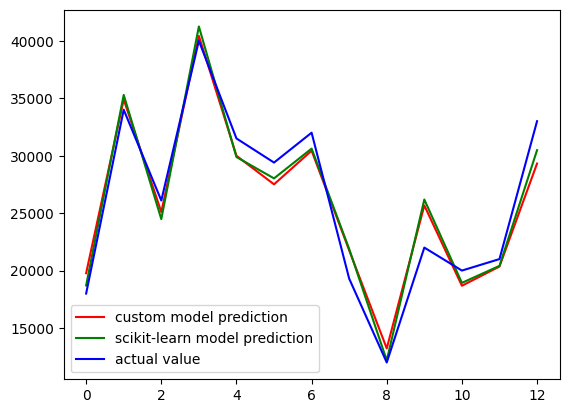

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(list(range(len(dependent_feature))), custom_trained_results, color = 'red', label = 'custom model prediction')
plt.plot(list(range(len(dependent_feature))), sci_predicted, color = 'green', label = 'scikit-learn model prediction')
plt.plot(list(range(len(dependent_feature))), dependent_feature, color = 'blue', label = 'actual value')
plt.legend(loc="lower left")
plt.show()

***